In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Define the path to the directory containing the feature files
directory_path = '/content/drive/MyDrive/FYP_dataset/features'

# Get a list of all feature file paths in the directory
feature_files = glob.glob(directory_path + '/*.csv')

# Define lists to store the feature and target data
X = []
y_a = []
y_v = []

# Iterate over each feature file
for file in feature_files:
    # Read the feature file into a DataFrame
    df = pd.read_csv(file)

    # Extract the features and target variables
    features = df.drop(['Arousal_Value', 'Valence_Value','frameTime'], axis=1).values
    arousal = df['Arousal_Value'].values
    valence = df['Valence_Value'].values

    # Append the data to the lists
    X.append(features)
    y_a.append(arousal)
    y_v.append(valence)

# Concatenate the feature and target arrays
X = np.concatenate(X)
y_a = np.concatenate(y_a)
y_v = np.concatenate(y_v)


In [33]:
print(X.shape)
print(y_a.shape)
print(y_v.shape)

print(X[0].shape)

(106132, 260)
(106132,)
(106132,)
(260,)


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_a_train, y_a_test, y_v_train, y_v_test = train_test_split(X, y_a, y_v, test_size=0.2, random_state=42)


# Initialize and train the SVR model
svr_model_arosal = SVR(kernel='rbf')
svr_model_arosal.fit(X_train, y_a_train)

# Make predictions on the test set
y_a_pred = svr_model_arosal.predict(X_test)

# Calculate the root mean squared error (RMSE)
a_rmse = np.sqrt(mean_squared_error(y_a_test, y_a_pred))
print("Root Mean Squared Error (arosal) : ", a_rmse)


a_mae = mean_absolute_error(y_a_test, y_a_pred)
print("Mean Absolute Error (arosal) : ", a_mae)

a_r2=r2_score(y_a_test, y_a_pred)
print("R2 Score (arosal) : ", a_r2)



Root Mean Squared Error (arosal) :  0.22595051326780413
Mean Absolute Error (arosal) :  0.17724654639708695
R2 Score (arosal) :  0.3671929486771297


In [37]:

# Initialize and train the SVR model
svr_model_valence = SVR(kernel='rbf')
svr_model_valence.fit(X_train, y_v_train)

# Make predictions on the test set
y_v_pred = svr_model_valence.predict(X_test)

# Calculate the root mean squared error (RMSE)
v_rmse = np.sqrt(mean_squared_error(y_v_test, y_v_pred))
print("Root Mean Squared Error (valence) : ", v_rmse)

v_mae = mean_absolute_error(y_v_test, y_v_pred)
print("Mean Absolute Error (valence) : ", v_mae)

v_r2=r2_score(y_v_test, y_v_pred)
print("R2 Score (valence) : ", v_r2)




Root Mean Squared Error (valence) :  0.21151384243234544
Mean Absolute Error (valence) :  0.16899236740160797
R2 Score (valence) :  0.1896222591245924


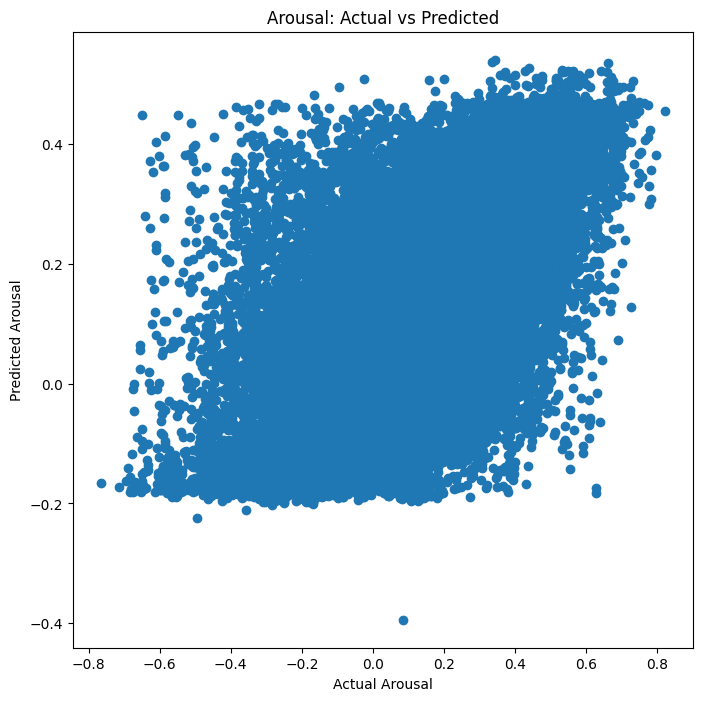

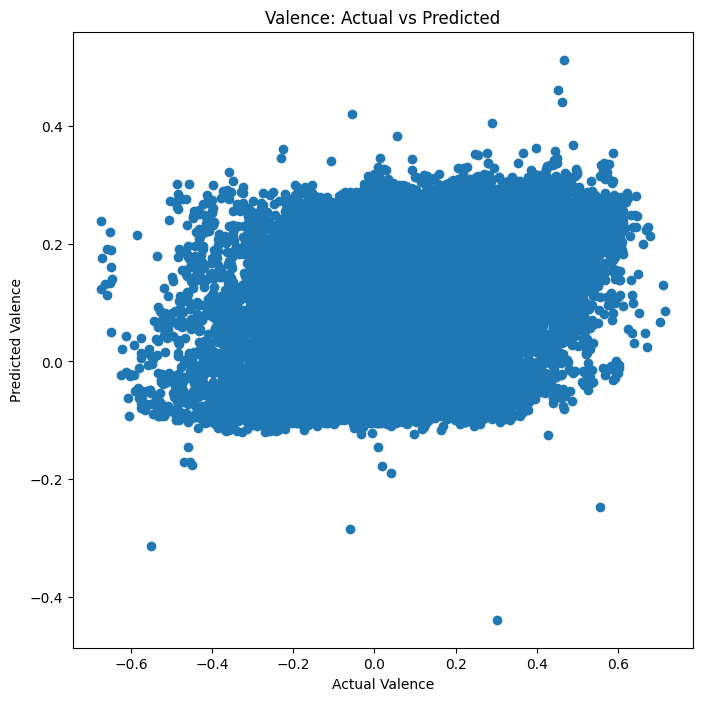

In [38]:
import matplotlib.pyplot as plt
# Plot the predicted values against the actual values for Arousal
plt.figure(figsize=(8, 8))
plt.scatter(y_a_test, y_a_pred)
plt.xlabel('Actual Arousal')
plt.ylabel('Predicted Arousal')
plt.title('Arousal: Actual vs Predicted')
plt.show()

# Plot the predicted values against the actual values for Valence
plt.figure(figsize=(8, 8))
plt.scatter(y_v_test, y_v_pred)
plt.xlabel('Actual Valence')
plt.ylabel('Predicted Valence')
plt.title('Valence: Actual vs Predicted')
plt.show()